# **1. Librerias e importaciones.**

In [31]:
# Importando paquetes basicos:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando el estilo para las grficas:
plt.style.use('ggplot')

# Importando bibliotecas de NLP y Word Cloud (imagenes):
#from wordcloud import WordCloud, STOPWORDS
#import nltk.tokenize as word_tokenize
#import re
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#import string
#import re
#from nltk.stem.porter import *
#from nltk.tokenize import sent_tokenize
#from sklearn.feature_extraction import stop_words

# **2. Importando los datos.**

In [32]:
# Importando los datos:

url = 'https://raw.githubusercontent.com/canacosmic/Cannabis-Classifier/master/cannabis_data.csv'

strains = pd.read_csv(url)

# **3. Conocer los datos.**

In [33]:
# Conociendo los datos:
print('Strain Shape:')
print(strains.shape)
print('')
print('Strain Info:')
print(strains.info())
print('')
strains.head(5)

Strain Shape:
(2351, 6)

Strain Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [34]:
strains['Type'] = strains.Type.astype(str)
# Visualizando las estructura de los datos:
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


# **4. Exploracion y visualizacion de datos.**

De entrada podemos observar que existen tres "Type" de cannabis las cuales son las siguientes:



1.   **Sativa**

1.   **Indica**
2.   **Hybird**




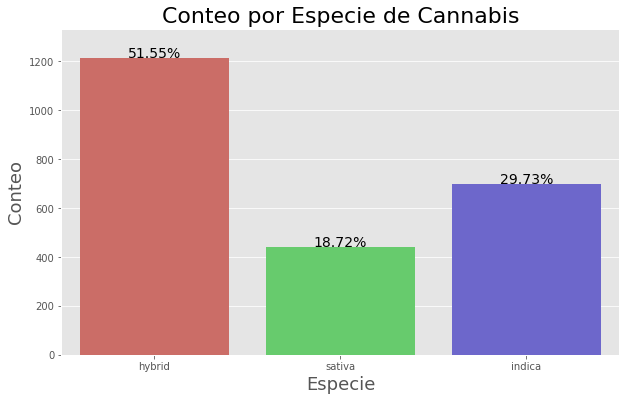

In [35]:
# Checando la distribucion de los "Types":

total = len(strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Conteo por Especie de Cannabis", fontsize=22)
g.set_xlabel('Especie', fontsize=18)
g.set_ylabel('Conteo', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [36]:
print("Rating Distribuition by Species Type:")
Q = pd.crosstab(strains[strains.Rating > 3.0]['Rating'], strains.Type).T
Q

Rating Distribuition by Species Type:


Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


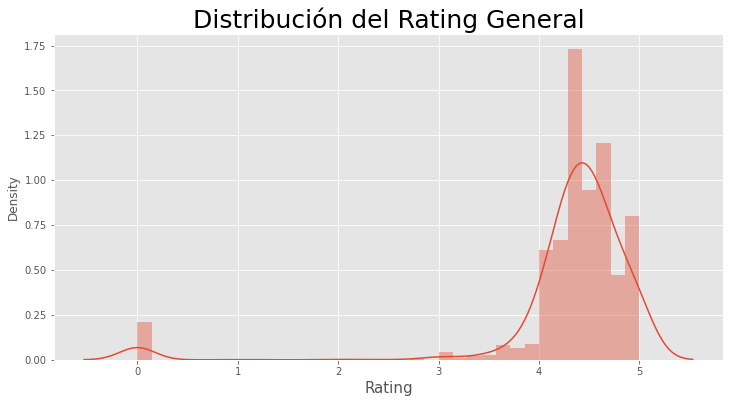

In [37]:
# Visualizando el rating general de las tres cepas.
plt.figure(figsize=(12,6))

g = sns.distplot(strains["Rating"],
                 bins=35)
g.set_title("Distribución del Rating General", 
            size = 25)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

De acuerdo con esta figura podemos observar que la mayoria de las cepas tienen un rating general entre 4 y 4.5.


Continuemos por analizar la distribucion de de Rating por especie.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

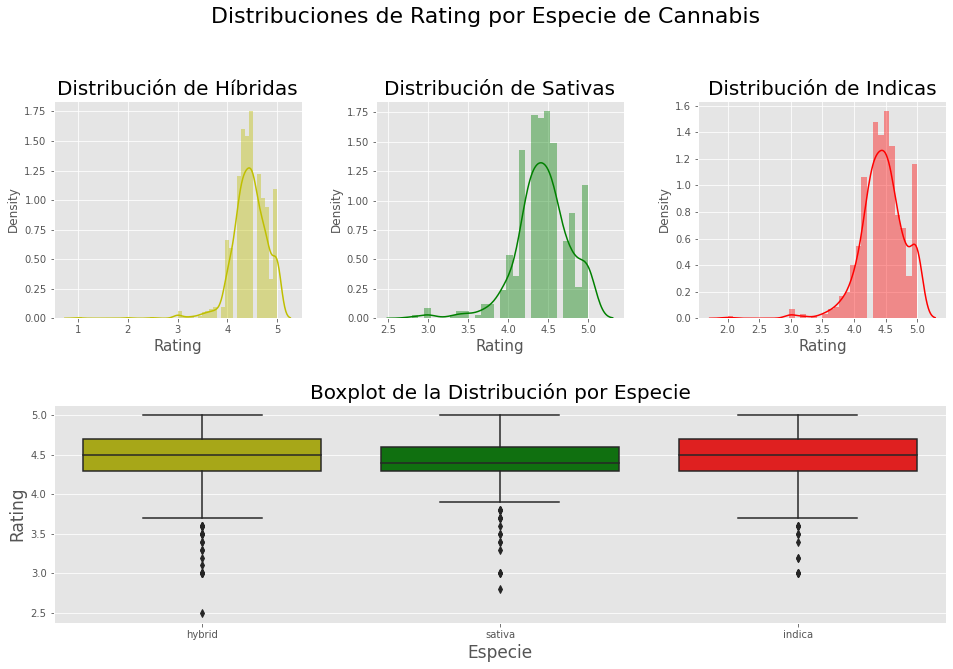

In [38]:
plt.figure(figsize=(16,10))

plt.suptitle('Distribuciones de Rating por Especie de Cannabis', fontsize=22)

g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_title("Distribución de Híbridas", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_title("Distribución de Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_title("Distribución de Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

# Distribucion de ratin por Type:
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot de la Distribución por Especie", 
            fontsize=20)
g3.set_xlabel("Especie", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

A continuación se exploraránlos effectos en relacion al rating:

In [39]:
# Creando dos Df nuevos separando efectos y sabores:
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [40]:
 # Concatenando las nuevas variables con las cepas:
 #Concatenating the new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

#Looking the result
strains.head()

strains.columns


Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

Los Top 5 Efectos Relacionados con las Tres Especies Son:
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


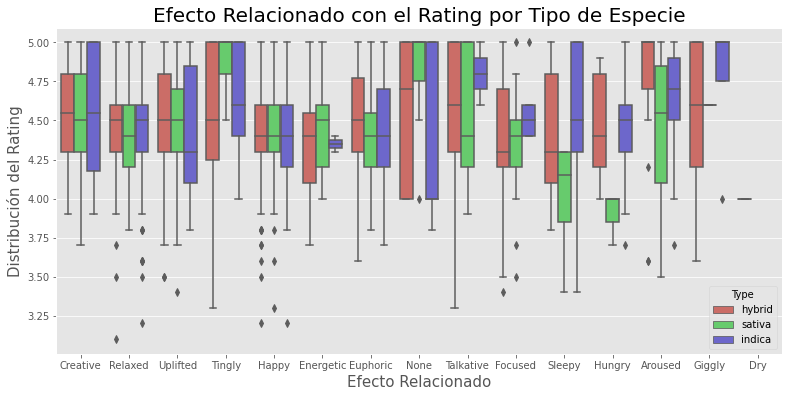

In [41]:
print("Los Top 5 Efectos Relacionados con las Tres Especies Son:")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Efecto Relacionado", fontsize=15)
g.set_ylabel("Distribución del Rating", fontsize=15)
g.set_title("Efecto Relacionado con el Rating por Tipo de Especie",
            fontsize=20)

plt.show()

Podemos ver que nustros tres efectos favoritos ante los consumidores son:



1.  Relaxed.

1.   Happy.
2.   Euphoric.


Siguiente se explorarán los sabores. Se tienen 33 sabores distintos.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


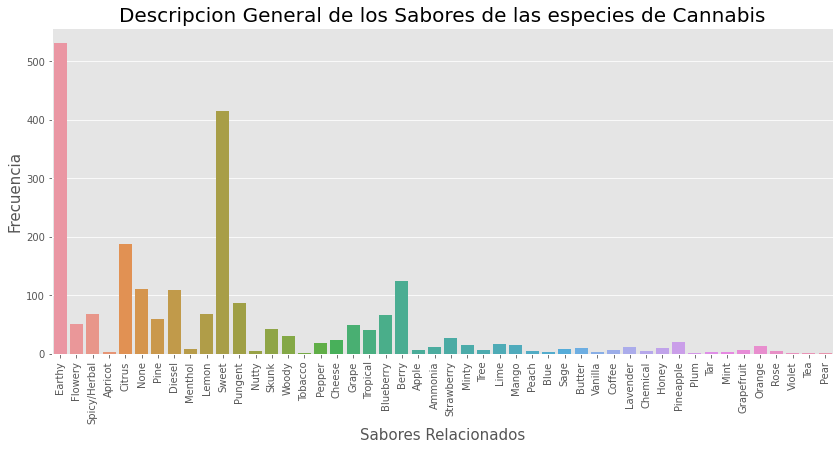

In [42]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('Sabores Relacionados', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.title("Descripcion General de los Sabores de las especies de Cannabis",
          fontsize=20)
plt.show()

Siguiente se explorarán las cepas con 5 de rating.

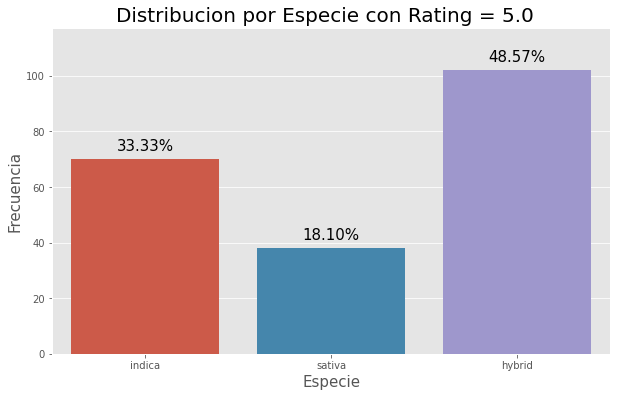

In [43]:
total_rat5 = len(strains[strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Especie', fontsize=15)
g.set_ylabel('Frecuencia', fontsize=15)
g.set_title("Distribucion por Especie con Rating = 5.0  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()

De esta grafica podemos ver qeu de todas las cepas con rating igual a 5 las hibridas poseen la mayor cantidad de cepas con rating igual a 5 y quien menos tiene son las stivas.

Ahora se explorará los principales efectos y sabores en relacion con cepas calificadas con un rating de 5 estrellas.

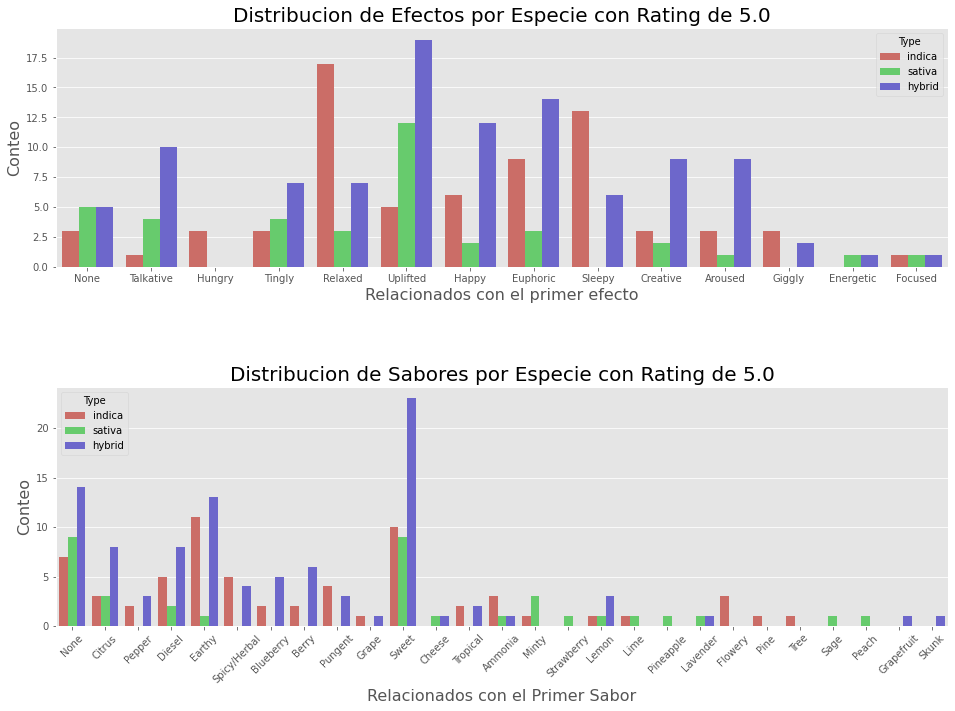

In [44]:
strains_top = strains[strains["Rating"] == 5]

plt.figure(figsize=(16,11))

plt.subplot(211)
g = sns.countplot(x ='Effect_1',data = strains_top,hue="Type",
              palette='hls')
g.set_title("Distribucion de Efectos por Especie con Rating de 5.0", fontsize=20)
g.set_xlabel('Relacionados con el primer efecto', fontsize=16)
g.set_ylabel('Conteo', fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",
              palette='hls')
g1.set_title("Distribucion de Sabores por Especie con Rating de 5.0", fontsize=20)
g1.set_xlabel('Relacionados con el Primer Sabor', fontsize=16)
g1.set_ylabel('Conteo', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()

Se puede inferir que en las tres especies, los tipos los sabores mas relacionados son el Dulce y Tierroso.

Explorando todos los effectos y sabores en relacion con cada cepa:


In [45]:
# Creando subsets:
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

# Borrando columnas que no nos sirven:
del strains["Effects"]
del strains["Flavor"]

# Usando esta funcion creada por LiamLarsen que separa: 
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

**a) Sativa:**

In [46]:
# Contando las sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Contadno indicas
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Contando hibridas:
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

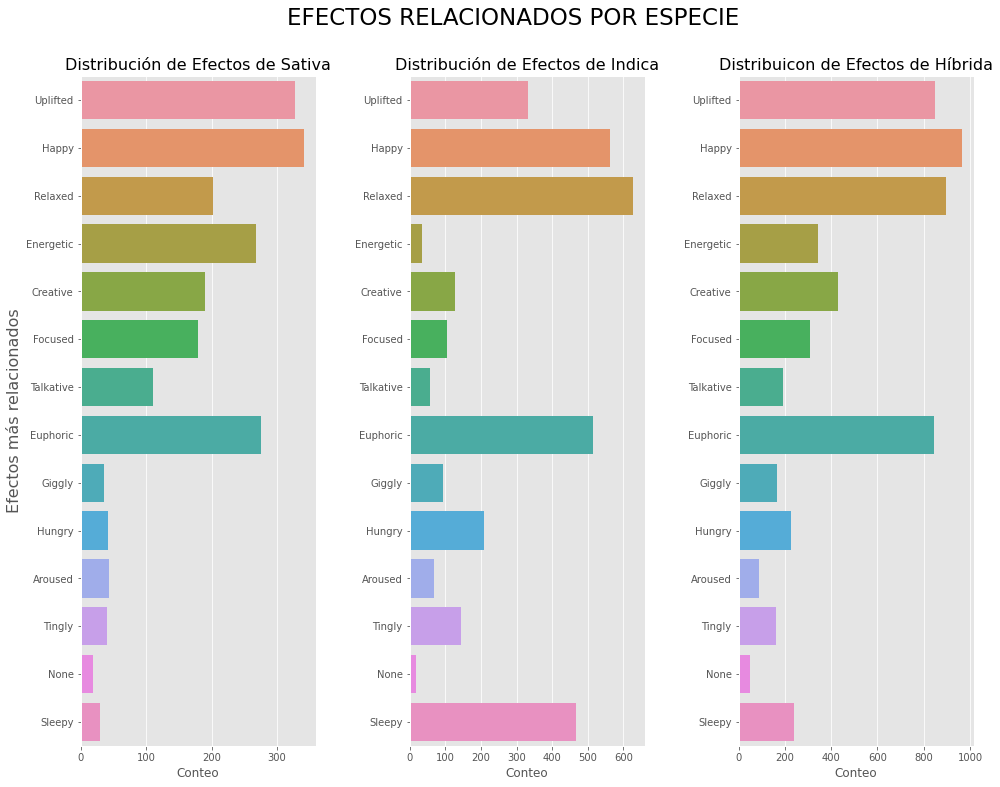

In [47]:
plt.figure(figsize=(16,12))

plt.suptitle('EFECTOS RELACIONADOS POR ESPECIE', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Conteo", fontsize=12)
g.set_ylabel("Efectos más relacionados", fontsize=16)
g.set_title("Distribución de Efectos de Sativa", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Conteo", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Distribución de Efectos de Indica", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Conteo", fontsize=12)
g2.set_ylabel("",fontsize=12)
plt.title("Distribuicon de Efectos de Híbrida", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

Ahora se explorarán los sabores y efectos en General.


In [48]:
# usando una funcion similar a la de LiamLarsen para cortar cada sabor por fila:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

Sabores de las Sativas:

In [49]:
# Sabores de Sativas:
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(sativa_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Sabores de Indicas:
indica_flavors = flavors(indicas)
indica_flavors = pd.DataFrame.from_dict(indica_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Sabores de Hibridas:
hibridas_flavors = flavors(hibridas)
hibridas_flavors = pd.DataFrame.from_dict(hibridas_flavors,
                                          orient='index').reset_index().rename(columns={'index': 'flavors',
                                                                                        0:'count'})

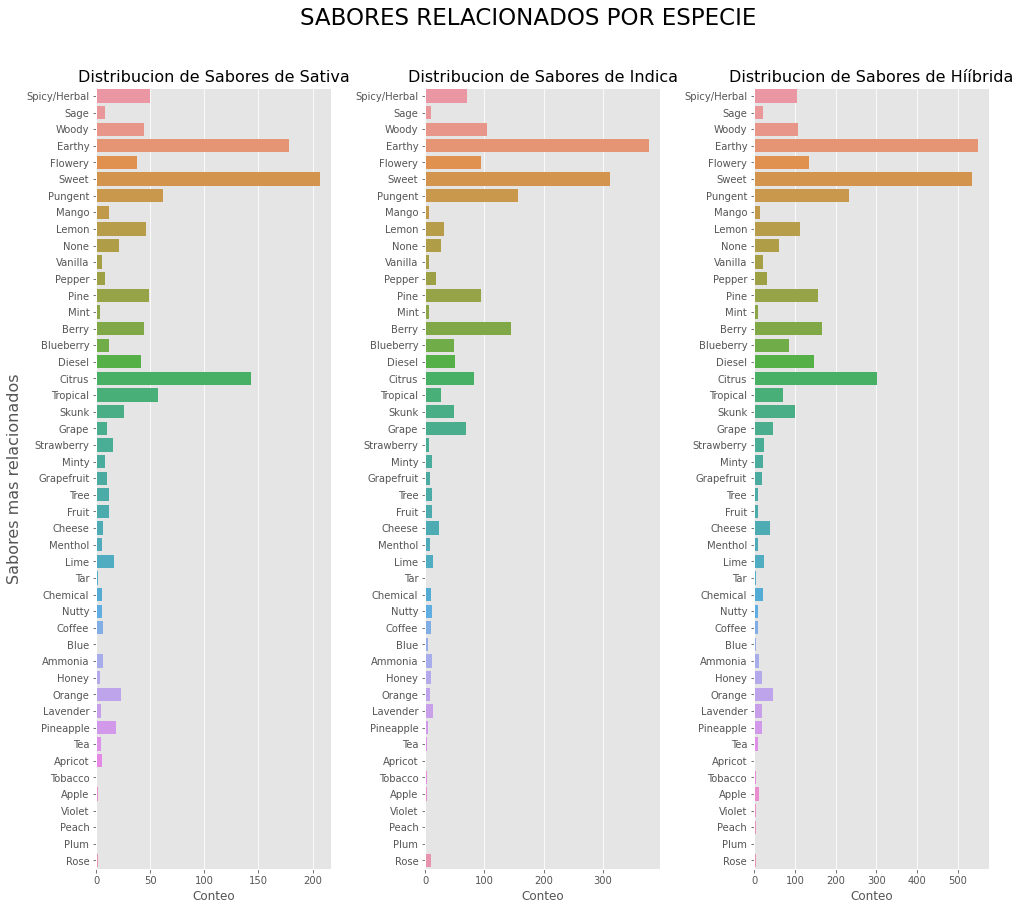

In [50]:
plt.figure(figsize=(16,14))
plt.suptitle('SABORES RELACIONADOS POR ESPECIE', fontsize=23)
plt.subplot(131)
g = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel("Conteo", fontsize=12)
g.set_ylabel("Sabores mas relacionados", fontsize=16)
g.set_title("Distribucion de Sabores de Sativa", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=indica_flavors, orient='h')
g1.set_xlabel("Conteo", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Distribucion de Sabores de Indica", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=hibridas_flavors, orient='h')
plt.xlabel("Conteo", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Distribucion de Sabores de Hííbrida", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

# **5. Prepocesamiento de datos**

In [51]:
### Codificando el Target ###

# Transformando Type(las cepas) en numericas:
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]
'''
Ahora tenemos tres Types pero numericos:
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica
'''

### Creando features dummies ###
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

# Concatenando dummies:
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 232)

# **6. Importando Sklearn y el modelos**

In [52]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

**Feature Selection:**

In [53]:
X = strains.drop("Type",1)
y = strains["Type"]
feature_name = X.columns.tolist()

X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

# Separando y entrenando:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 231)
X_test Shape:  (706, 231)


In [54]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (1645, 89)
X_important_test Shape:  (706, 89)


# **7. Modelos**

LogReg: 0.642553 (+/- 0.026260)
KNN: 0.573252 (+/- 0.019848)
DecisionTreeClassifier: 0.527052 (+/- 0.017365)


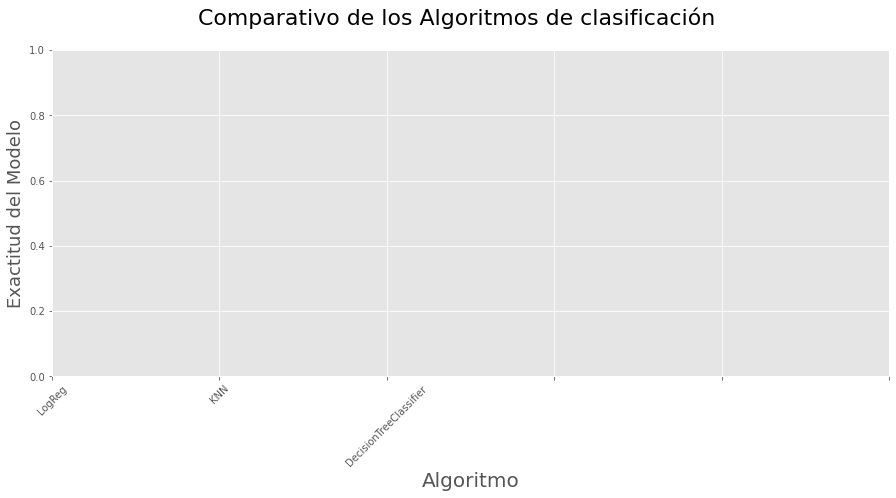

In [64]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())])))

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())])))

scoring = 'accuracy'
n_folds = 7

results, names  = [], []

for name, model  in clfs:
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

# Creando la figura:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparativo de los Algoritmos de clasificación', fontsize=22)
ax = fig.add_subplot(111)
#sns.boxplot(x = names, y = results)
ax.set_xticklabels(names)
ax.set_xlabel("Algoritmo", fontsize=20)
ax.set_ylabel("Exactitud del Modelo", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


### La neta no se porque en mi ciclo for no está insertando los valores obtenidos para cada modelo utilizado...Chale... pero antes si jalaba...que pasoooooo
